## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).mean(),
                          "Median Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).median(),
                          "Variance of Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).var(),
                          "Standard Deviation for Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).std(),
                          "SEM of Tumor Volume (mm3)": mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).sem()})
summary_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation for Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# create sorted list of drug names
drug_list = sorted(mouse_df["Drug Regimen"].unique().tolist())

# make tick locations with drug_list
tick_locations = np.arange(len(drug_list))

# title and labels
bar_title = "Data Points per Drug Regimen"
bar_xlabel = "Drug Regimen"
bar_ylabel = "Number of Data Points"

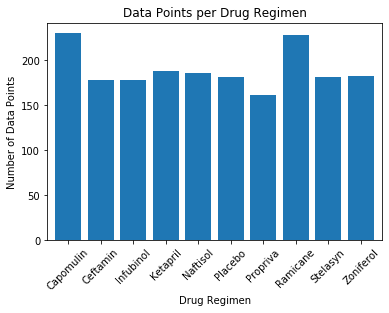

In [4]:
# create a new series with only the drug name and number of data points
drug_and_count = mouse_df["Tumor Volume (mm3)"].groupby(mouse_df["Drug Regimen"]).count()

# create bar plot using pandas
drug_and_count.plot(kind="bar", legend=False, width=.8)

# assign xticks and rotate 45 degrees
plt.xticks(tick_locations, drug_list, rotation=45)

# give plot a title and label
plt.title(bar_title)
plt.ylabel(bar_ylabel)

# display plot
plt.show()

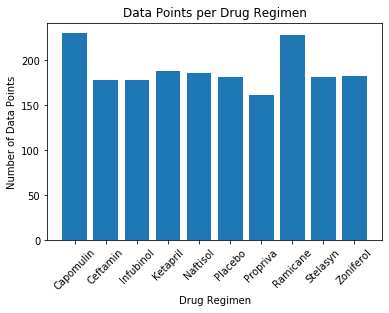

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# create bar plot using pyplot
plt.bar(drug_list, mouse_df["Drug Regimen"].groupby(mouse_df["Drug Regimen"]).value_counts())

# assign xticks and rotate 45 degrees
plt.xticks(tick_locations, drug_list, rotation=45)

# give plot a title and label
plt.title(bar_title)
plt.xlabel(bar_xlabel)
plt.ylabel(bar_ylabel)

# display plot
plt.show()

## Pie plots

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_title = "Distribution of Female versus Male Mice"
pie_ylabel = "Sex"

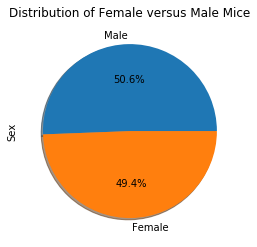

In [7]:
gender_s = mouse_df["Sex"].value_counts()
gender_s.plot(kind="pie", autopct='%1.1f%%', shadow=True)
plt.title(pie_title)
plt.show()

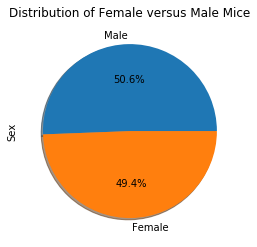

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_list = ["Male", "Female"]
plt.pie(gender_s, labels=gender_list, autopct='%1.1f%%', shadow=True)
plt.title(pie_title)
plt.ylabel(pie_ylabel)
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [11]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# probably need bins here

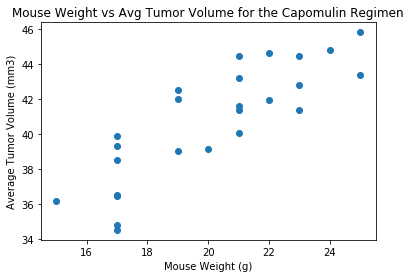

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# create data frame with only Capomulin data
capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", :]

# create data frame with average tumor volume and average weight per mouse on Capomulin
df = pd.DataFrame(
    {
        "Avg Tumor Volume (mm3)": capomulin_df["Tumor Volume (mm3)"].groupby(capomulin_df["Mouse ID"]).mean(),
        "Avg Weight (g)": capomulin_df["Weight (g)"].groupby(capomulin_df["Mouse ID"]).mean()
    }
)

# create scatter plot
plt.scatter(df["Avg Weight (g)"], df["Avg Tumor Volume (mm3)"])

# give plot title and labels
plt.title("Mouse Weight vs Avg Tumor Volume for the Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# display plot
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen